In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:


df = pd.read_csv('/content/drive/MyDrive/code alpha/german.data',
                 delim_whitespace=True, header=None)


/tmp/ipython-input-2943231213.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('/content/drive/MyDrive/code alpha/german.data',


In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


In [ ]:
columns = [
    "Status_of_existing_checking_account",   # A11-A14
    "Duration_in_month",                     # numeric
    "Credit_history",                        # A30-A34
    "Purpose",                               # A40-A49
    "Credit_amount",                         # numeric
    "Savings_account_bonds",                # A61-A65
    "Present_employment_since",              # A71-A75
    "Installment_rate_in_percentage_of_disposable_income",
    "Personal_status_and_sex",               # A91-A95
    "Other_debtors_guarantors",             # A101-A103
    "Present_residence_since",              # numeric
    "Property",                              # A121-A124
    "Age_in_years",                          # numeric
    "Other_installment_plans",              # A141-A143
    "Housing",                               # A151-A153
    "Number_of_existing_credits_at_this_bank",
    "Job",                                   # A171-A174
    "Number_of_people_being_liable_to_provide_maintenance_for",
    "Telephone",                             # A191-A192
    "Foreign_worker",                        # A201-A202
    "Credit_risk"                            # 1 = good, 2 = bad
]


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/code alpha/german.data',
                 delim_whitespace=True, header=None)
df.columns = columns

print(df.head())


  Status_of_existing_checking_account  Duration_in_month Credit_history  \
0                                 A11                  6            A34   
1                                 A12                 48            A32   
2                                 A14                 12            A34   
3                                 A11                 42            A32   
4                                 A11                 24            A33   

  Purpose  Credit_amount Savings_account_bonds Present_employment_since  \
0     A43           1169                   A65                      A75   
1     A43           5951                   A61                      A73   
2     A46           2096                   A61                      A74   
3     A42           7882                   A61                      A74   
4     A40           4870                   A61                      A73   

   Installment_rate_in_percentage_of_disposable_income  \
0                                       

/tmp/ipython-input-693571532.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('/content/drive/MyDrive/code alpha/german.data',


In [ ]:
df.sample()

,Status_of_existing_checking_account,Duration_in_month,Credit_history,Purpose,Credit_amount,Savings_account_bonds,Present_employment_since,Installment_rate_in_percentage_of_disposable_income,Personal_status_and_sex,Other_debtors_guarantors,...,Property,Age_in_years,Other_installment_plans,Housing,Number_of_existing_credits_at_this_bank,Job,Number_of_people_being_liable_to_provide_maintenance_for,Telephone,Foreign_worker,Credit_risk
630,A11,24,A32,A43,3660,A61,A73,2,A92,A101,...,A123,28,A143,A152,1,A173,1,A191,A201,1


In [ ]:
# Replace categorical codes with human-readable labels
df['Status_of_existing_checking_account'] = df['Status_of_existing_checking_account'].replace({
    'A11': '<0 DM', 'A12': '0<=X<200 DM', 'A13': '>=200 DM', 'A14': 'no_account'
})

df['Credit_history'] = df['Credit_history'].replace({
    'A30': 'no_credits/all_paid', 'A31': 'all_paid_back', 'A32': 'existing_paid_back',
    'A33': 'delay_in_past', 'A34': 'critical_account'
})

df['Purpose'] = df['Purpose'].replace({
    'A40': 'car_new', 'A41': 'car_used', 'A42': 'furniture', 'A43': 'radio_tv',
    'A44': 'domestic_appliances', 'A45': 'repairs', 'A46': 'education',
    'A47': 'vacation', 'A48': 'retraining', 'A49': 'business'
})

df['Savings_account_bonds'] = df['Savings_account_bonds'].replace({
    'A61': '<100 DM', 'A62': '100-500 DM', 'A63': '500-1000 DM', 'A64': '>=1000 DM', 'A65': 'unknown'
})

df['Present_employment_since'] = df['Present_employment_since'].replace({
    'A71': 'unemployed', 'A72': '<1 year', 'A73': '1-4 years', 'A74': '4-7 years', 'A75': '>=7 years'
})

df['Personal_status_and_sex'] = df['Personal_status_and_sex'].replace({
    'A91': 'male_divorced/separated', 'A92': 'female_divorced/separated/married',
    'A93': 'male_single', 'A94': 'male_married/widowed', 'A95': 'female_single'
})

df['Other_debtors_guarantors'] = df['Other_debtors_guarantors'].replace({
    'A101': 'none', 'A102': 'co-applicant', 'A103': 'guarantor'
})

df['Property'] = df['Property'].replace({
    'A121': 'real_estate', 'A122': 'building_society/insurance', 'A123': 'car_or_other', 'A124': 'unknown'
})

df['Other_installment_plans'] = df['Other_installment_plans'].replace({
    'A141': 'bank', 'A142': 'stores', 'A143': 'none'
})

df['Housing'] = df['Housing'].replace({
    'A151': 'rent', 'A152': 'own', 'A153': 'free'
})

df['Job'] = df['Job'].replace({
    'A171': 'unemployed_non_resident', 'A172': 'unskilled_resident',
    'A173': 'skilled_employee', 'A174': 'management_self_employed'
})

df['Telephone'] = df['Telephone'].replace({
    'A191': 'none', 'A192': 'yes_registered'
})

df['Foreign_worker'] = df['Foreign_worker'].replace({
    'A201': 'yes', 'A202': 'no'
})


In [ ]:
df

,Status_of_existing_checking_account,Duration_in_month,Credit_history,Purpose,Credit_amount,Savings_account_bonds,Present_employment_since,Installment_rate_in_percentage_of_disposable_income,Personal_status_and_sex,Other_debtors_guarantors,...,Property,Age_in_years,Other_installment_plans,Housing,Number_of_existing_credits_at_this_bank,Job,Number_of_people_being_liable_to_provide_maintenance_for,Telephone,Foreign_worker,Credit_risk
0,<0 DM,6,critical_account,radio_tv,1169,unknown,>=7 years,4,male_single,none,...,real_estate,67,none,own,2,skilled_employee,1,yes_registered,yes,1
1,0<=X<200 DM,48,existing_paid_back,radio_tv,5951,<100 DM,1-4 years,2,female_divorced/separated/married,none,...,real_estate,22,none,own,1,skilled_employee,1,none,yes,2
2,no_account,12,critical_account,education,2096,<100 DM,4-7 years,2,male_single,none,...,real_estate,49,none,own,1,unskilled_resident,2,none,yes,1
3,<0 DM,42,existing_paid_back,furniture,7882,<100 DM,4-7 years,2,male_single,guarantor,...,building_society/insurance,45,none,free,1,skilled_employee,2,none,yes,1
4,<0 DM,24,delay_in_past,car_new,4870,<100 DM,1-4 years,3,male_single,none,...,unknown,53,none,free,2,skilled_employee,2,none,yes,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no_account,12,existing_paid_back,furniture,1736,<100 DM,4-7 years,3,female_divorced/separated/married,none,...,real_estate,31,none,own,1,unskilled_resident,1,none,yes,1
996,<0 DM,30,existing_paid_back,car_used,3857,<100 DM,1-4 years,4,male_divorced/separated,none,...,building_society/insurance,40,none,own,1,management_self_employed,1,yes_registered,yes,1
997,no_account,12,existing_paid_back,radio_tv,804,<100 DM,>=7 years,4,male_single,none,...,car_or_other,38,none,own,1,skilled_employee,1,none,yes,1
998,<0 DM,45,existing_paid_back,radio_tv,1845,<100 DM,1-4 years,4,male_single,none,...,unknown,23,none,free,1,skilled_employee,1,yes_registered,yes,2


In [ ]:
df.isnull().sum()

,0
Status_of_existing_checking_account,0
Duration_in_month,0
Credit_history,0
Purpose,0
Credit_amount,0
Savings_account_bonds,0
Present_employment_since,0
Installment_rate_in_percentage_of_disposable_income,0
Personal_status_and_sex,0
Other_debtors_guarantors,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.columns

Index(['Status_of_existing_checking_account', 'Duration_in_month',
       'Credit_history', 'Purpose', 'Credit_amount', 'Savings_account_bonds',
       'Present_employment_since',
       'Installment_rate_in_percentage_of_disposable_income',
       'Personal_status_and_sex', 'Other_debtors_guarantors',
       'Present_residence_since', 'Property', 'Age_in_years',
       'Other_installment_plans', 'Housing',
       'Number_of_existing_credits_at_this_bank', 'Job',
       'Number_of_people_being_liable_to_provide_maintenance_for', 'Telephone',
       'Foreign_worker', 'Credit_risk'],
      dtype='object')

In [ ]:
df['Status_of_existing_checking_account'].value_counts()

,count
Status_of_existing_checking_account,
no_account,394
<0 DM,274
0<=X<200 DM,269
>=200 DM,63


In [ ]:
df.rename(columns={"Status_of_existing_checking_account": "Current_Balance"}, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Current_Balance                                           1000 non-null   object
 1   Duration_in_month                                         1000 non-null   int64 
 2   Credit_history                                            1000 non-null   object
 3   Purpose                                                   1000 non-null   object
 4   Credit_amount                                             1000 non-null   int64 
 5   Savings_account_bonds                                     1000 non-null   object
 6   Present_employment_since                                  1000 non-null   object
 7   Installment_rate_in_percentage_of_disposable_income       1000 non-null   int64 
 8   Personal_status_and_sex      

In [ ]:
df

,Current_Balance,Duration_in_month,Credit_history,Purpose,Credit_amount,Savings_account_bonds,Present_employment_since,Installment_rate_in_percentage_of_disposable_income,Personal_status_and_sex,Other_debtors_guarantors,...,Property,Age_in_years,Other_installment_plans,Housing,Number_of_existing_credits_at_this_bank,Job,Number_of_people_being_liable_to_provide_maintenance_for,Telephone,Foreign_worker,Credit_risk
0,<0 DM,6,critical_account,radio_tv,1169,unknown,>=7 years,4,male_single,none,...,real_estate,67,none,own,2,skilled_employee,1,yes_registered,yes,1
1,0<=X<200 DM,48,existing_paid_back,radio_tv,5951,<100 DM,1-4 years,2,female_divorced/separated/married,none,...,real_estate,22,none,own,1,skilled_employee,1,none,yes,2
2,no_account,12,critical_account,education,2096,<100 DM,4-7 years,2,male_single,none,...,real_estate,49,none,own,1,unskilled_resident,2,none,yes,1
3,<0 DM,42,existing_paid_back,furniture,7882,<100 DM,4-7 years,2,male_single,guarantor,...,building_society/insurance,45,none,free,1,skilled_employee,2,none,yes,1
4,<0 DM,24,delay_in_past,car_new,4870,<100 DM,1-4 years,3,male_single,none,...,unknown,53,none,free,2,skilled_employee,2,none,yes,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no_account,12,existing_paid_back,furniture,1736,<100 DM,4-7 years,3,female_divorced/separated/married,none,...,real_estate,31,none,own,1,unskilled_resident,1,none,yes,1
996,<0 DM,30,existing_paid_back,car_used,3857,<100 DM,1-4 years,4,male_divorced/separated,none,...,building_society/insurance,40,none,own,1,management_self_employed,1,yes_registered,yes,1
997,no_account,12,existing_paid_back,radio_tv,804,<100 DM,>=7 years,4,male_single,none,...,car_or_other,38,none,own,1,skilled_employee,1,none,yes,1
998,<0 DM,45,existing_paid_back,radio_tv,1845,<100 DM,1-4 years,4,male_single,none,...,unknown,23,none,free,1,skilled_employee,1,yes_registered,yes,2


In [ ]:
df['Current_Balance'] = df['Current_Balance'].str.replace(' DM', '', regex=False)


In [ ]:
df

,Current_Balance,Duration_in_month,Credit_history,Purpose,Credit_amount,Savings_account_bonds,Present_employment_since,Installment_rate_in_percentage_of_disposable_income,Personal_status_and_sex,Other_debtors_guarantors,...,Property,Age_in_years,Other_installment_plans,Housing,Number_of_existing_credits_at_this_bank,Job,Number_of_people_being_liable_to_provide_maintenance_for,Telephone,Foreign_worker,Credit_risk
0,<0,6,critical_account,radio_tv,1169,unknown,>=7 years,4,male_single,none,...,real_estate,67,none,own,2,skilled_employee,1,yes_registered,yes,1
1,0<=X<200,48,existing_paid_back,radio_tv,5951,<100 DM,1-4 years,2,female_divorced/separated/married,none,...,real_estate,22,none,own,1,skilled_employee,1,none,yes,2
2,no_account,12,critical_account,education,2096,<100 DM,4-7 years,2,male_single,none,...,real_estate,49,none,own,1,unskilled_resident,2,none,yes,1
3,<0,42,existing_paid_back,furniture,7882,<100 DM,4-7 years,2,male_single,guarantor,...,building_society/insurance,45,none,free,1,skilled_employee,2,none,yes,1
4,<0,24,delay_in_past,car_new,4870,<100 DM,1-4 years,3,male_single,none,...,unknown,53,none,free,2,skilled_employee,2,none,yes,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no_account,12,existing_paid_back,furniture,1736,<100 DM,4-7 years,3,female_divorced/separated/married,none,...,real_estate,31,none,own,1,unskilled_resident,1,none,yes,1
996,<0,30,existing_paid_back,car_used,3857,<100 DM,1-4 years,4,male_divorced/separated,none,...,building_society/insurance,40,none,own,1,management_self_employed,1,yes_registered,yes,1
997,no_account,12,existing_paid_back,radio_tv,804,<100 DM,>=7 years,4,male_single,none,...,car_or_other,38,none,own,1,skilled_employee,1,none,yes,1
998,<0,45,existing_paid_back,radio_tv,1845,<100 DM,1-4 years,4,male_single,none,...,unknown,23,none,free,1,skilled_employee,1,yes_registered,yes,2


In [ ]:
def current_bal_correction(a):
  if a=='<0':
    return 0
  elif a=='no_account':
    return -1
  elif a=='0<=X<200':
    return 1
  else:
    return 2

In [ ]:
df['Current_Balance']=df['Current_Balance'].apply(current_bal_correction)

In [ ]:
df

,Current_Balance,Duration_in_month,Credit_history,Purpose,Credit_amount,Savings_account_bonds,Present_employment_since,Installment_rate_in_percentage_of_disposable_income,Personal_status_and_sex,Other_debtors_guarantors,...,Property,Age_in_years,Other_installment_plans,Housing,Number_of_existing_credits_at_this_bank,Job,Number_of_people_being_liable_to_provide_maintenance_for,Telephone,Foreign_worker,Credit_risk
0,0,6,critical_account,radio_tv,1169,unknown,>=7 years,4,male_single,none,...,real_estate,67,none,own,2,skilled_employee,1,yes_registered,yes,1
1,1,48,existing_paid_back,radio_tv,5951,<100 DM,1-4 years,2,female_divorced/separated/married,none,...,real_estate,22,none,own,1,skilled_employee,1,none,yes,2
2,-1,12,critical_account,education,2096,<100 DM,4-7 years,2,male_single,none,...,real_estate,49,none,own,1,unskilled_resident,2,none,yes,1
3,0,42,existing_paid_back,furniture,7882,<100 DM,4-7 years,2,male_single,guarantor,...,building_society/insurance,45,none,free,1,skilled_employee,2,none,yes,1
4,0,24,delay_in_past,car_new,4870,<100 DM,1-4 years,3,male_single,none,...,unknown,53,none,free,2,skilled_employee,2,none,yes,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1,12,existing_paid_back,furniture,1736,<100 DM,4-7 years,3,female_divorced/separated/married,none,...,real_estate,31,none,own,1,unskilled_resident,1,none,yes,1
996,0,30,existing_paid_back,car_used,3857,<100 DM,1-4 years,4,male_divorced/separated,none,...,building_society/insurance,40,none,own,1,management_self_employed,1,yes_registered,yes,1
997,-1,12,existing_paid_back,radio_tv,804,<100 DM,>=7 years,4,male_single,none,...,car_or_other,38,none,own,1,skilled_employee,1,none,yes,1
998,0,45,existing_paid_back,radio_tv,1845,<100 DM,1-4 years,4,male_single,none,...,unknown,23,none,free,1,skilled_employee,1,yes_registered,yes,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Current_Balance                                           1000 non-null   int64 
 1   Duration_in_month                                         1000 non-null   int64 
 2   Credit_history                                            1000 non-null   object
 3   Purpose                                                   1000 non-null   object
 4   Credit_amount                                             1000 non-null   int64 
 5   Savings_account_bonds                                     1000 non-null   object
 6   Present_employment_since                                  1000 non-null   object
 7   Installment_rate_in_percentage_of_disposable_income       1000 non-null   int64 
 8   Personal_status_and_sex      

In [ ]:
df['Credit_history'].value_counts()

,count
Credit_history,
existing_paid_back,530
critical_account,293
delay_in_past,88
all_paid_back,49
no_credits/all_paid,40


In [ ]:
df = pd.get_dummies(df, drop_first=True)
df['Credit_risk'] = df['Credit_risk'].replace({1: 0, 2: 1})
display(df.head())

,Current_Balance,Duration_in_month,Credit_amount,Installment_rate_in_percentage_of_disposable_income,Present_residence_since,Age_in_years,Number_of_existing_credits_at_this_bank,Number_of_people_being_liable_to_provide_maintenance_for,Credit_risk,Credit_history_critical_account,...,Property_unknown,Other_installment_plans_none,Other_installment_plans_stores,Housing_own,Housing_rent,Job_skilled_employee,Job_unemployed_non_resident,Job_unskilled_resident,Telephone_yes_registered,Foreign_worker_yes
0,0,6,1169,4,4,67,2,1,0,True,...,False,True,False,True,False,True,False,False,True,True
1,1,48,5951,2,2,22,1,1,1,False,...,False,True,False,True,False,True,False,False,False,True
2,-1,12,2096,2,3,49,1,2,0,True,...,False,True,False,True,False,False,False,True,False,True
3,0,42,7882,2,4,45,1,2,0,False,...,False,True,False,False,False,True,False,False,False,True
4,0,24,4870,3,4,53,2,2,1,False,...,True,True,False,False,False,True,False,False,False,True


In [ ]:
X = df.drop('Credit_risk', axis=1)
y = df['Credit_risk']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (800, 46)
Shape of X_test: (200, 46)
Shape of y_train: (800,)
Shape of y_test: (200,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

lr_model = LogisticRegression()
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)

**Reasoning**:
Fit the instantiated models to the training data.



In [ ]:
lr_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

**Reasoning**:
Evaluate each trained model using the imported metrics and print the results.



In [ ]:
# Evaluate Logistic Regression
lr_pred = lr_model.predict(X_test)
lr_proba = lr_model.predict_proba(X_test)[:, 1]
print("Logistic Regression Performance:")
print(f"  Precision: {precision_score(y_test, lr_pred):.4f}")
print(f"  Recall: {recall_score(y_test, lr_pred):.4f}")
print(f"  F1-Score: {f1_score(y_test, lr_pred):.4f}")
print(f"  ROC-AUC: {roc_auc_score(y_test, lr_proba):.4f}")
print("-" * 30)

# Evaluate Decision Tree
dt_pred = dt_model.predict(X_test)
dt_proba = dt_model.predict_proba(X_test)[:, 1]
print("Decision Tree Performance:")
print(f"  Precision: {precision_score(y_test, dt_pred):.4f}")
print(f"  Recall: {recall_score(y_test, dt_pred):.4f}")
print(f"  F1-Score: {f1_score(y_test, dt_pred):.4f}")
print(f"  ROC-AUC: {roc_auc_score(y_test, dt_proba):.4f}")
print("-" * 30)

# Evaluate Random Forest
rf_pred = rf_model.predict(X_test)
rf_proba = rf_model.predict_proba(X_test)[:, 1]
print("Random Forest Performance:")
print(f"  Precision: {precision_score(y_test, rf_pred):.4f}")
print(f"  Recall: {recall_score(y_test, rf_pred):.4f}")
print(f"  F1-Score: {f1_score(y_test, rf_pred):.4f}")
print(f"  ROC-AUC: {roc_auc_score(y_test, rf_proba):.4f}")

Logistic Regression Performance:
  Precision: 0.5750
  Recall: 0.3898
  F1-Score: 0.4646
  ROC-AUC: 0.7708
------------------------------
Decision Tree Performance:
  Precision: 0.5493
  Recall: 0.6610
  F1-Score: 0.6000
  ROC-AUC: 0.7170
------------------------------
Random Forest Performance:
  Precision: 0.7241
  Recall: 0.3559
  F1-Score: 0.4773
  ROC-AUC: 0.8122


In [ ]:
dt_feature_importance = pd.Series(dt_model.feature_importances_, index=X_train.columns)
rf_feature_importance = pd.Series(rf_model.feature_importances_, index=X_train.columns)

dt_top_features = dt_feature_importance.sort_values(ascending=False).head(10)
rf_top_features = rf_feature_importance.sort_values(ascending=False).head(10)

print("Top 10 Feature Importances (Decision Tree):")
print(dt_top_features)
print("\nTop 10 Feature Importances (Random Forest):")
print(rf_top_features)

Top 10 Feature Importances (Decision Tree):
Credit_amount                                          0.123319
Age_in_years                                           0.108778
Duration_in_month                                      0.098512
Current_Balance                                        0.096661
Present_residence_since                                0.043193
Purpose_radio_tv                                       0.032483
Installment_rate_in_percentage_of_disposable_income    0.025939
Number_of_existing_credits_at_this_bank                0.025778
Personal_status_and_sex_male_single                    0.025763
Savings_account_bonds_<100 DM                          0.024874
dtype: float64

Top 10 Feature Importances (Random Forest):
Credit_amount                                          0.121460
Age_in_years                                           0.093613
Current_Balance                                        0.089573
Duration_in_month                                      0.085583


In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, rf_pred)
print("Accuracy Score:", accuracy)


Accuracy Score: 0.77


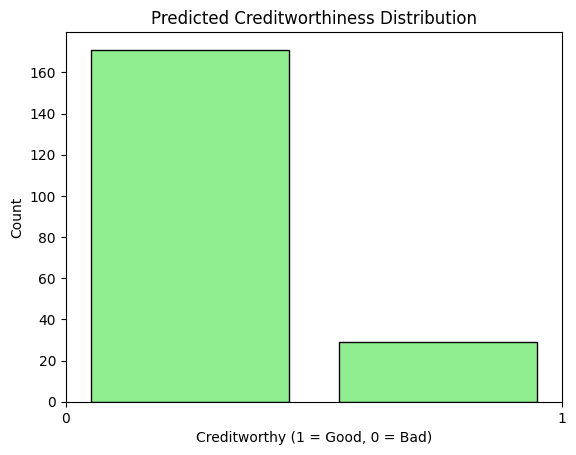

In [ ]:
import matplotlib.pyplot as plt

#y_pred = model.predict(X_test)

plt.hist(rf_pred, bins=2, color='lightgreen', edgecolor='black', rwidth=0.8)
plt.title('Predicted Creditworthiness Distribution')
plt.xlabel('Creditworthy (1 = Good, 0 = Bad)')
plt.ylabel('Count')
plt.xticks([0, 1])
plt.show()


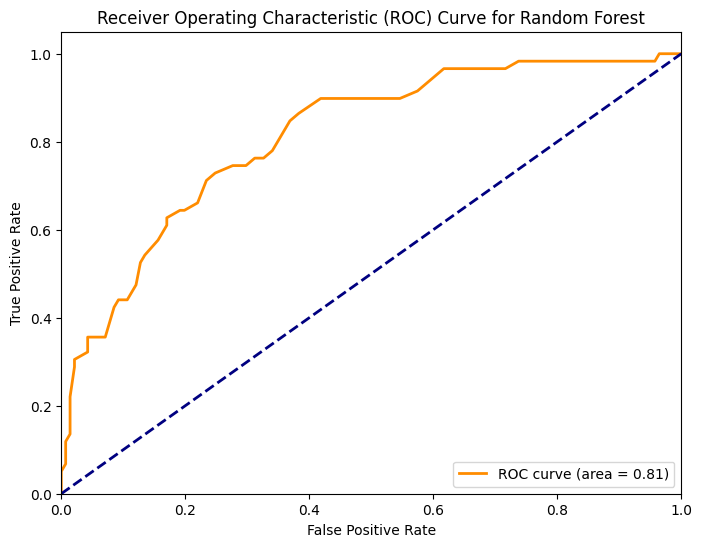

In [ ]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, rf_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()

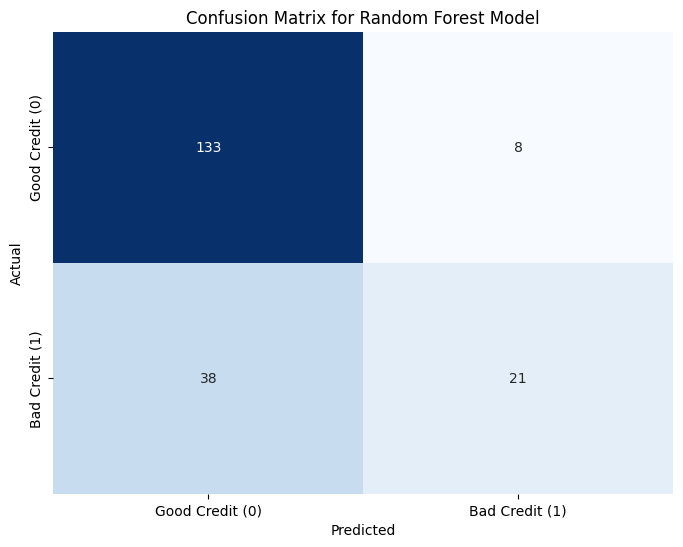

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, rf_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Good Credit (0)', 'Bad Credit (1)'],
            yticklabels=['Good Credit (0)', 'Bad Credit (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

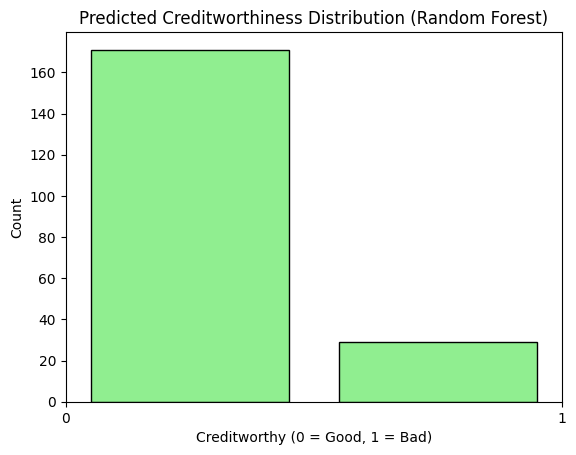

In [ ]:
plt.hist(rf_pred, bins=2, color='lightgreen', edgecolor='black', rwidth=0.8)
plt.title('Predicted Creditworthiness Distribution (Random Forest)')
plt.xlabel('Creditworthy (0 = Good, 1 = Bad)')
plt.ylabel('Count')
plt.xticks([0, 1])
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

lr_accuracy = accuracy_score(y_test, lr_pred)
dt_accuracy = accuracy_score(y_test, dt_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)

print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

Logistic Regression Accuracy: 0.7350
Decision Tree Accuracy: 0.7400
Random Forest Accuracy: 0.7700
